# DeltaSquare NGO Income Analysis and Prediction

## Background

DeltaSquare is an NGO that works with the Government on matters of social policy to bring about a change in the lives of underprivileged sections of society. They are tasked with coming up with a policy framework by looking at some data gotten from WHO.

## Problem

This project aims to answer the following key questions:
- What are the different factors that influence the income of an individual?
- Are these factors things that can be controlled or influenced by creating new laws or amending current ones?
- What are the measures the government can take to incentivize or disincentivize the laws?
- Is there a good predictive model for income that exists? What does the performance assessment look like for such a model?

## Objectives

The goal of this project is to: 
- Discover and analyse the different factors that influence the income of an individual
- Identify the underprivileged persons in the society by using various factors to predict their income class (<50K).

The developed model would be optimised for recall because it is important for the government to identify as many underpriviledged persons in the society as possible in order to design a policy framework that would be suitable for these group of people.

## Data Description

The data contains characteristics of the people:

- **age**: Age of a Person
- **workclass**: Type of employment e.g Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked
- **fnlwgt**: This weight is assigned by the Current Population Survey (CPS). People with similar demographic characteristics should have similar weights since it is a feature aimed to allocate similar weights to people with similar demographic characteristics
- **education**: Degree the person has - Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- **education-num**: Number of years a person studied
- **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- **sex**: Female, Male.
- **capital-gain**: Investment gain of the person other than salary
- **capital-loss**: Loss from investments
- **hours-per-week**: Number of hours a person works
- **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- **salary**: >50K, <=50K (dependent variable, the salary is in Dollars per year)

## Analysis and Prediction

### Import relevant libraries

In [1]:
import numpy as np # numerical computations
import pandas as pd # data manipulation

# for creating visualisations
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

from sklearn.linear_model import LogisticRegression # builds the model
from sklearn.preprocessing import StandardScaler # data normalisation

# performance metrics computation
from sklearn.metrics import (precision_score, recall_score, f1_score, accuracy_score, precision_recall_curve,
                             roc_auc_score, ConfusionMatrixDisplay, confusion_matrix, roc_curve)

### Load the data

In [2]:
data = pd.read_csv('who_data.csv') # loading the data
df = data.copy() # making a copy of the data to preserve the integrity of the original one
df.head() # showing the first 5 rows of the data

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Perform Exploratory Data Analysis

In [3]:
# checking the dimension of the data
df.shape

(32561, 15)

- There are 32,561 rows and 15 columns in the data

In [4]:
# checking for empty values
for i in df.columns: #looping through each column
    for row, value in enumerate(df[i]): #looping through each row in the columns 
        if value == ' ': #looking for empty values
            print(f'Empty value found on row: {row}') #printing a message if an empty value is found

- There are no empty strings found in the dataset

In [5]:
# checking for duplicated values
df.duplicated().sum()

24

There are 24 duplicated rows in the data. This would be treated by dropping the duplicates

In [6]:
df.drop_duplicates(inplace=True) # drop the duplicates
df.reset_index(drop=True, inplace=True) # reset the index

In [7]:
# quality check
df.duplicated().sum()

0

- The duplicated values have been treated

In [8]:
# checking the unique values in the columns
for col in df.columns:
    print(f'{col}:\n')
    print(df[col].unique())
    print('_' * 80)

age:

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
________________________________________________________________________________
workclass:

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
________________________________________________________________________________
fnlwgt:

[ 77516  83311 215646 ...  34066  84661 257302]
________________________________________________________________________________
education:

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
________________________________________________________________________________
education_no_of_years:

[13  9  7 14  5 10 12 11  4

**Observations:**
- All object type columns have a leading white space in the values
- There are special characters (?) in the 'workclass', 'occupation', and 'native_country' columns. These would be converted to null
- There are several versions of married which I would be standardizing to just 'Married'
- Hong and South in the native_country column would be changed to China and South Korea respectively. Hong Kong is not a country.

In [9]:
# removing leading white spaces
def remove_space(variable):
    """Function to remove leading space in an object type column 
    Args:
        variable: values in a specified column
    Returns: values with the leading space removed
        
    """
    if isinstance(variable, str): # checks if the value is a string
        return variable.lstrip() # removes the space
    else:
        return variable # returns the variable if the value is not a string
    
df = df.applymap(remove_space) # applying the function to all values of the dataframe

In [10]:
# converting question marks to null values
df.replace('?', pd.NA, inplace=True)

In [11]:
# standardizing the married values
mar_val = {'Married-civ-spouse':'Married', 'Married-spouse-absent':'Married', 'Married-AF-spouse':'Married'}
df['marital_status'].replace(mar_val, inplace=True)

In [12]:
# confirming the race of Hong and South to be Asian
print('Hong:\n')
print(df[df['native_country']=='Hong']['race'].value_counts())
print('_' * 50)
print('\nSouth\n')
print(df[df['native_country']=='South']['race'].value_counts())

Hong:

Asian-Pac-Islander    17
White                  2
Amer-Indian-Eskimo     1
Name: race, dtype: int64
__________________________________________________

South

Asian-Pac-Islander    77
Amer-Indian-Eskimo     2
White                  1
Name: race, dtype: int64


In [13]:
# changing Hong to Hong Kong and South to South Korea
nat_cont = {'Hong':'Hong-Kong', 'South':'South-Korea'}
df['native_country'].replace(nat_cont, inplace=True)

In [14]:
# quality check
for col in df.columns:
    print(f'{col}:\n')
    print(df[col].unique())
    print('_' * 80)

age:

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
________________________________________________________________________________
workclass:

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' <NA>
 'Self-emp-inc' 'Without-pay' 'Never-worked']
________________________________________________________________________________
fnlwgt:

[ 77516  83311 215646 ...  34066  84661 257302]
________________________________________________________________________________
education:

['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
________________________________________________________________________________
education_no_of_years:

[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
_

- All leading spaces in the object type columns have been removed
- All special characters (?) have been converted to null values
- All versions of married have been standardized
- Hong and South have been replaced with Hong-Kong and South-Korea respectively

In [15]:
# summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32537 entries, 0 to 32536
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32537 non-null  int64 
 1   workclass               30701 non-null  object
 2   fnlwgt                  32537 non-null  int64 
 3   education               32537 non-null  object
 4   education_no_of_years   32537 non-null  int64 
 5   marital_status          32537 non-null  object
 6   occupation              30694 non-null  object
 7   relationship            32537 non-null  object
 8   race                    32537 non-null  object
 9   sex                     32537 non-null  object
 10  capital_gain            32537 non-null  int64 
 11  capital_loss            32537 non-null  int64 
 12  working_hours_per_week  32537 non-null  int64 
 13  native_country          31955 non-null  object
 14  salary                  32537 non-null  object
dtypes:

**Observations:**
- All data types have been cast accurately. There are 6 integer type columns and 9 object type columns
- age, fnlwgt, education_no_of_years, capital_gain, capital_loss, working_hours_per_week are integers
- workclass, education, marital_status, occupation, relationship, race, sex, native_country and salary are objects.
- There are null values in the workclass, occupation and native_country columns

#### Treating the null values

In [16]:
# checking for the null values
df.isnull().sum()

age                          0
workclass                 1836
fnlwgt                       0
education                    0
education_no_of_years        0
marital_status               0
occupation                1843
relationship                 0
race                         0
sex                          0
capital_gain                 0
capital_loss                 0
working_hours_per_week       0
native_country             582
salary                       0
dtype: int64

 - There are null values in the **workclass (1836)**, **occupation (1843)** and **native_country (582)** columns

#### Workclass column

In [17]:
# checking the null values in the workclass column
df[df['workclass'].isnull()].sample(10)

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
3146,32,<NA>,199244,10th,6,Divorced,<NA>,Not-in-family,White,Female,0,0,40,United-States,<=50K
28529,68,<NA>,186266,HS-grad,9,Married,<NA>,Wife,White,Female,0,0,8,United-States,<=50K
31072,17,<NA>,172145,10th,6,Never-married,<NA>,Own-child,Black,Female,0,0,40,United-States,<=50K
22487,19,<NA>,182590,10th,6,Never-married,<NA>,Not-in-family,White,Female,0,0,38,United-States,<=50K
1458,76,<NA>,211453,HS-grad,9,Widowed,<NA>,Not-in-family,Black,Female,0,0,2,United-States,<=50K
5344,20,<NA>,432376,Some-college,10,Never-married,<NA>,Own-child,White,Male,0,0,40,Germany,<=50K
12854,20,<NA>,150084,HS-grad,9,Never-married,<NA>,Own-child,White,Male,0,0,25,United-States,<=50K
2152,21,<NA>,300812,Some-college,10,Never-married,<NA>,Own-child,White,Male,0,0,30,United-States,<=50K
7661,17,<NA>,659273,11th,7,Never-married,<NA>,Own-child,Black,Female,0,0,40,Trinadad&Tobago,<=50K
17895,67,<NA>,63552,7th-8th,4,Widowed,<NA>,Not-in-family,White,Female,0,0,35,United-States,<=50K


- It seems to be the case that most of the rows where workclass has null values, also shows null values in the occupation column. As it is difficult to infer a person's workclass, especially when occupation is unknown, I would be dropping these values.

In [18]:
# dropping null values in the workclass column
df.dropna(subset=['workclass'], inplace=True)

#### Occupation column

In [19]:
# checking the null values in the occupation column
df[df['occupation'].isnull()]

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
5359,18,Never-worked,206359,10th,6,Never-married,<NA>,Own-child,White,Male,0,0,40,United-States,<=50K
10842,23,Never-worked,188535,7th-8th,4,Divorced,<NA>,Not-in-family,White,Male,0,0,35,United-States,<=50K
14767,17,Never-worked,237272,10th,6,Never-married,<NA>,Own-child,White,Male,0,0,30,United-States,<=50K
20328,18,Never-worked,157131,11th,7,Never-married,<NA>,Own-child,White,Female,0,0,10,United-States,<=50K
23217,20,Never-worked,462294,Some-college,10,Never-married,<NA>,Own-child,Black,Male,0,0,40,United-States,<=50K
32281,30,Never-worked,176673,HS-grad,9,Married,<NA>,Wife,Black,Female,0,0,40,United-States,<=50K
32291,18,Never-worked,153663,Some-college,10,Never-married,<NA>,Own-child,White,Male,0,0,4,United-States,<=50K


- It seems to be the case that the rows where occupation has null values are rows where the values of the workclass column is 'Never-worked'. I would be changing these values to 'Unemployed'.

In [20]:
# replacing the null values in the occupation column with unemployed
df['occupation'].fillna('Unemployed', inplace=True)

In [21]:
# quality check
df['occupation'].value_counts()

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Unemployed              7
Name: occupation, dtype: int64

#### Native_country column

In [22]:
# checking the null values in the native_country column
df[df['native_country'].isnull()].sample(10)

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
19028,39,Private,144608,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,<NA>,>50K
28179,32,Private,201988,Prof-school,15,Married,Sales,Husband,White,Male,4508,0,40,<NA>,<=50K
12000,46,Private,113806,12th,8,Married,Craft-repair,Husband,White,Male,7298,0,40,<NA>,>50K
21383,37,Self-emp-not-inc,187411,Bachelors,13,Married,Transport-moving,Husband,White,Male,0,0,50,<NA>,<=50K
4578,48,Private,229846,Assoc-voc,11,Divorced,Other-service,Not-in-family,White,Female,0,0,40,<NA>,<=50K
24908,68,Private,208478,Masters,14,Married,Prof-specialty,Husband,White,Male,0,0,18,<NA>,<=50K
18577,29,Private,54411,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,<NA>,<=50K
18669,33,Private,160216,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,32,<NA>,<=50K
13892,24,Private,193920,Masters,14,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,45,<NA>,<=50K
8363,34,Private,241360,HS-grad,9,Married,Prof-specialty,Husband,White,Male,0,0,40,<NA>,<=50K


- As it is difficult to infer a person's native_country, I would also be dropping these values

In [23]:
# dropping the null values in the native_country column
df.dropna(subset=['native_country'], inplace=True)

In [24]:
data[data['native_country']== ' ?']['race'].value_counts()

 White                 386
 Black                  96
 Asian-Pac-Islander     83
 Other                  18
Name: race, dtype: int64

In [25]:
# quality check
df.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
education                 0
education_no_of_years     0
marital_status            0
occupation                0
relationship              0
race                      0
sex                       0
capital_gain              0
capital_loss              0
working_hours_per_week    0
native_country            0
salary                    0
dtype: int64

- All null values in the dataset have been treated

#### Splitting the dataframe into numerical and object data frames

In [26]:
#getting the data in the numerical type columns
num_cols = df.select_dtypes(include='number')

# getting the data in the object type columns
obj_cols = df.select_dtypes(include='object')

In [27]:
obj_cols.describe(include='all').T

,count,unique,top,freq
workclass,30146,8,Private,22264
education,30146,16,HS-grad,9835
marital_status,30146,5,Married,14451
occupation,30146,15,Prof-specialty,4034
relationship,30146,6,Husband,12457
race,30146,5,White,25917
sex,30146,2,Male,20371
native_country,30146,41,United-States,27494
salary,30146,2,<=50K,22640


**Observations:**
- Most people work for private companies
- The mode education level is High School graduates
- The mode marital status is Married
- The mode occupation is Prof-specialty
- The mode relationship status is Husband
- Most common race is White
- Most people are men
- Most people come from the United States
- Most people earn below 50K

In [28]:
# statistical summary of the numerical columns
num_cols.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
age,30146.0,38.437570,13.132886,17.0,28.00,37.0,47.00,90.0
fnlwgt,30146.0,189803.430472,105658.809895,13769.0,117638.25,178419.0,237583.75,1484705.0
education_no_of_years,30146.0,10.121907,2.548979,1.0,9.00,10.0,13.00,16.0
capital_gain,30146.0,1092.587441,7408.269021,0.0,0.00,0.0,0.00,99999.0
capital_loss,30146.0,88.419392,404.400523,0.0,0.00,0.0,0.00,4356.0
working_hours_per_week,30146.0,40.931799,11.980794,1.0,40.00,40.0,45.00,99.0


**Observations:**
- Most people are between 28 - 47 years old
- Most people have a fnlwgt between 117638 - 237583
- Most people have spent between 9 - 13 years in school. It means that most people went to highschool or have a bachelor's degree 
- Most people have a capital gain and loss of 0, meaning that most people do not have investments
- Most people work between 40 - 45 hours per week

### Univariate analysis

**Numerical Variables**

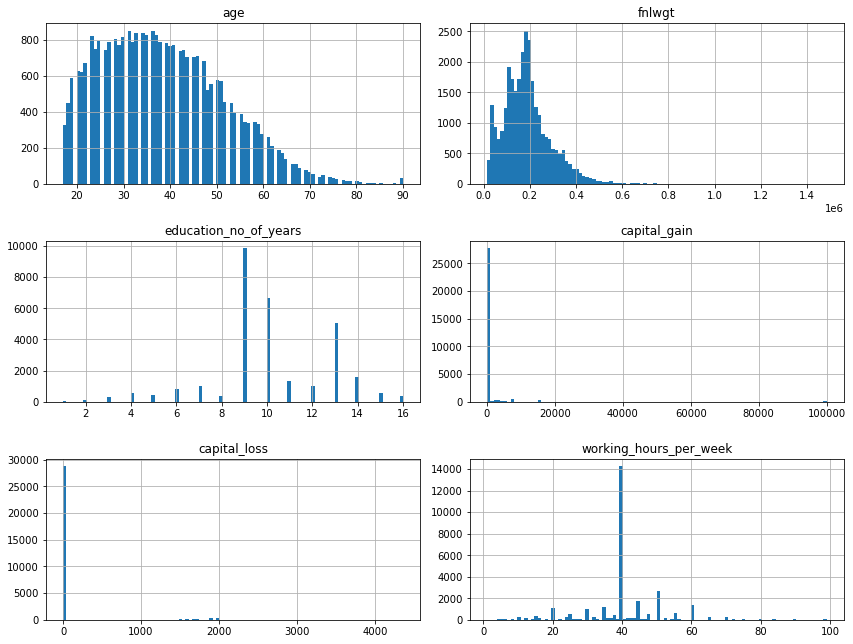

In [29]:
# plotting histograms of all the numerical columns
num_cols.hist(stacked = False, bins = 100, figsize = (12, 30), layout = (10, 2))
plt.tight_layout();

**Observations:**
- The age variable is right skewed. Most people are aged between 20 and 50
- The fnlwgt column is right skewed. Most people have a fnlwgt between 100000 to 200000
- Education number of years is more discrete with the highes occurence being 9
- Capital gain and loss is right skewed. Most people have no investments.
- Working hours per week seems to be evenly distributed, with the highest occurrence being 40.

**Categorical Variables**

In [30]:
# getting the object columns
obj_cols.columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'salary'],
      dtype='object')

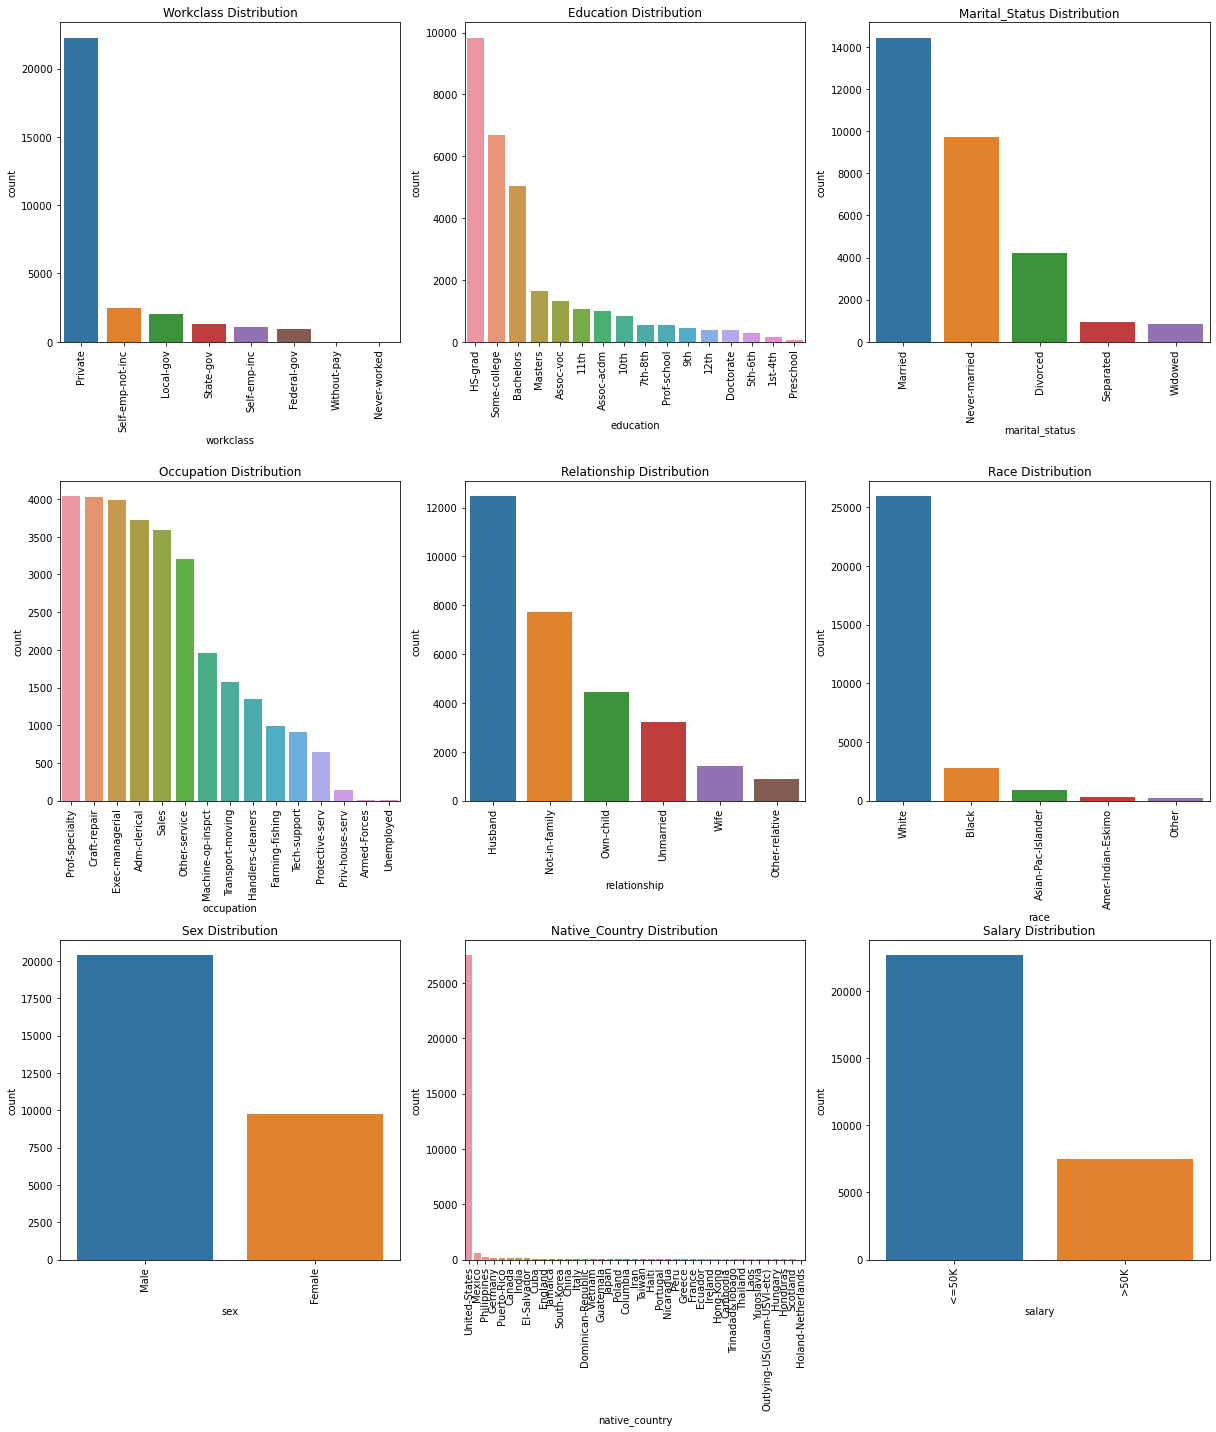

In [31]:
# unvariate plots of the categorical variables
plt.figure(figsize=(17, 20))

for i, variable in enumerate(obj_cols):
    plt.subplot(3, 3, i+1)
    order = df[variable].value_counts(ascending=False).index    
    ax=sns.countplot(x=df[variable], data=df, order=order)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.title(f"{variable.title()} Distribution")

**Observations**
- Most individuals work in private institutions
- Most people have a High School degree, followed by College degree, and then a Bachelor's degree
- Most people are married, followed by never-married and then divorced
- Most common occupations are Prof_Specialty, Craft-repair, Exec-Managerial. This is not suprising as majority of people in the data have a High School Diploma at the least
- Most common relationship is Husband
- The predominant race is white
- There are more males than females in the data
- Most common country is the United States, followed by Mexico

### Bivariate Analysis

**Converting the target variable (salary) to classes**

In [32]:
# computing the value count in salary
df.salary.value_counts()

<=50K    22640
>50K      7506
Name: salary, dtype: int64

In [33]:
# function to convert the target variable to classes
def encode_target(salary):
    """Function to convert the target variable to classes
    Args:
        salary: the salary variable
    Returns: 1 if salary is <=50K, else 0
    """
    if salary == '<=50K':
        return 1
    else:
        return 0

df_2 = df.copy() # making a copy of the df dataframe
df_2['salary'] = df_2['salary'].apply(encode_target)

In [34]:
# quality check
df_2.salary.value_counts()

1    22640
0     7506
Name: salary, dtype: int64

- In the target variable, the **minority class is 0 (people who earn >50K)** and the **majority class is 1 (people who earn <=50K)**. 

**Numerical Variables**

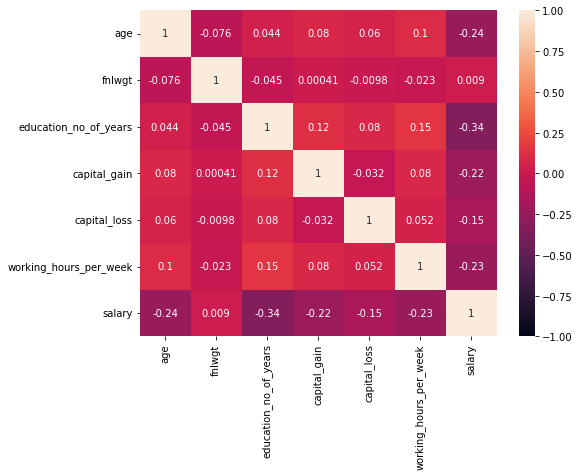

In [35]:
plt.figure(figsize = (8, 6))
num_df = df_2.select_dtypes(include='number')
sns.heatmap(num_df.corr(), annot=True, vmin=-1, vmax=1)
plt.savefig('corr');

- The variables have a very low correlation among themselves and the target variable

**Categorical Variables**

In [36]:
# dropping the target variable (salary) from the onject dataframe
obj_cols2 = obj_cols.drop('salary', axis = 1)
obj_cols2.columns.to_list()

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

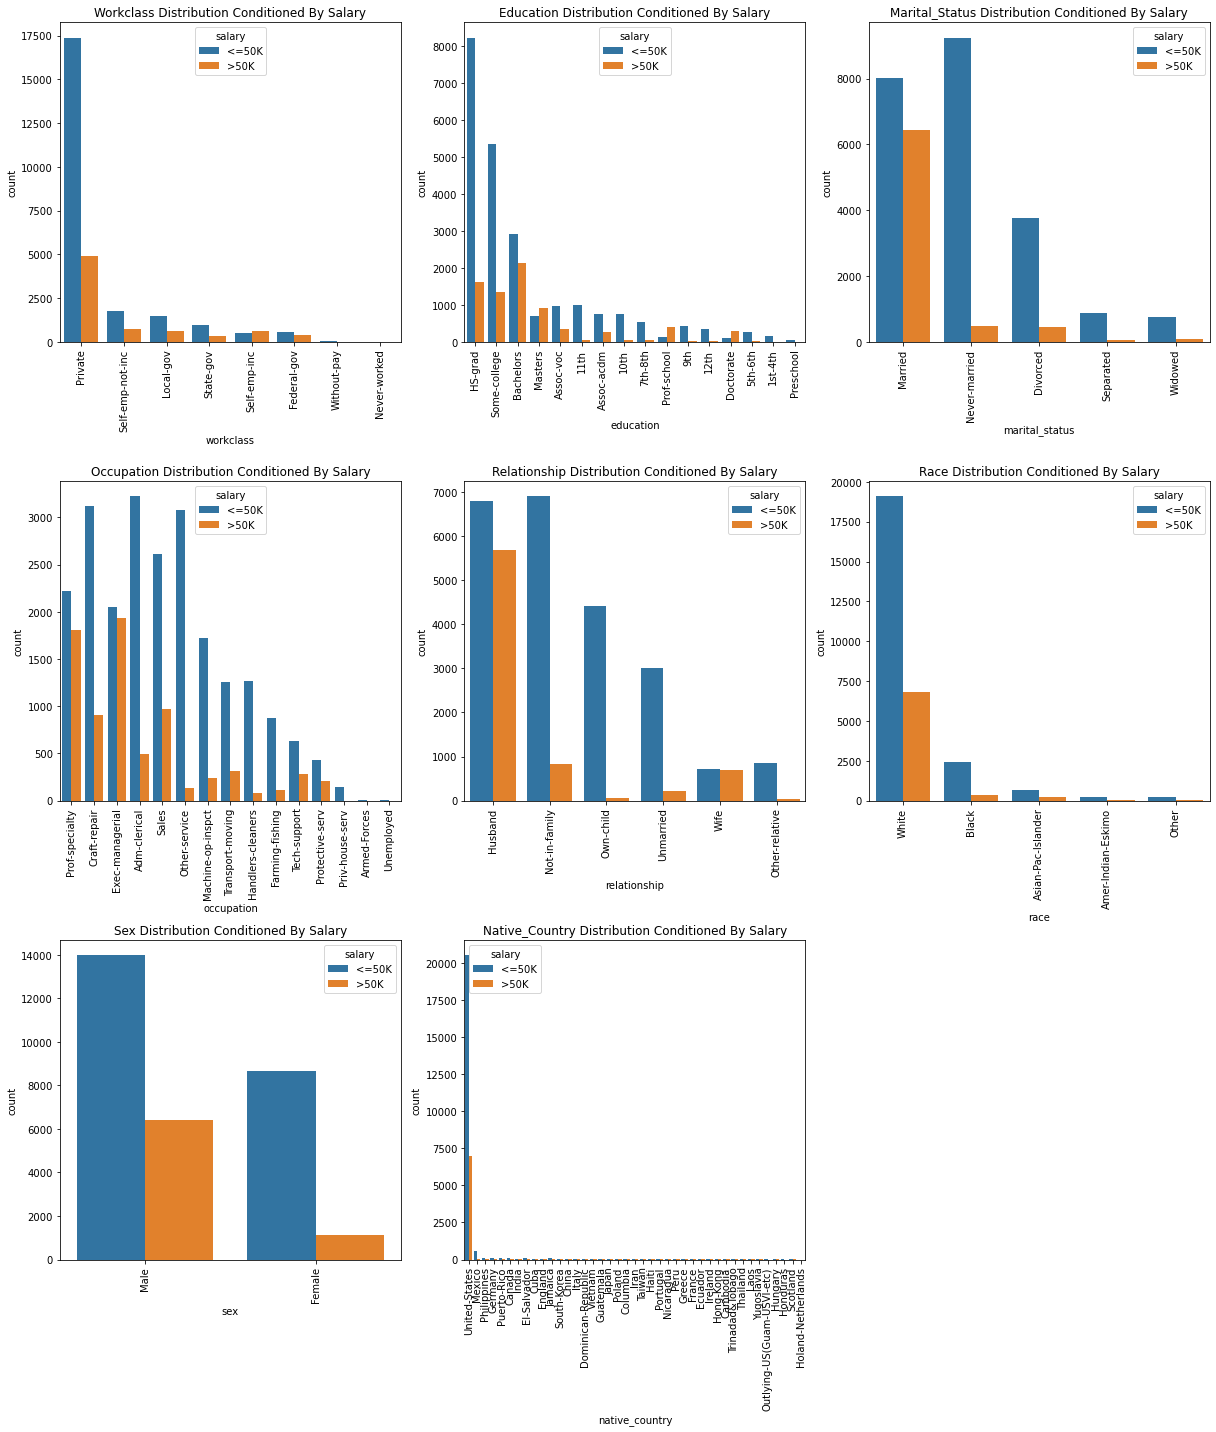

In [37]:
# plots of the categorical variables conditioned by the target
plt.figure(figsize=(17, 20))

for i, variable in enumerate(obj_cols2):
    plt.subplot(3, 3, i+1)
    order = df[variable].value_counts(ascending=False).index    
    ax=sns.countplot(x=df[variable], data=df, order=order, hue='salary')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.title(f"{variable.title()} Distribution Conditioned By Salary")
    plt.savefig('bi_cat')

**Observations:**
- The workclass of most people earning over 50K is Private, while the lowest is Never-worked
- The education level of most people earning over 50K is Bachelors, while the lowest is Preschool
- The marital status of most people earning over 50K is Married, while the lowest is Separated
- The occupation of most people earning over 50K is Exec-managerial, followed by Prof-specialty. The lowest is Unemployed
- The relationship of most people earning over 50K is husband, while the lowest is Other-relative
- The race of most people earning over 50K is White, while the lowest is Other
- More males earn over 50K than females
- The native country of most people earning over 50K is United-States

**Grouping Nationalities by Continent**

In [38]:
def group_by_continent(native_country):
    """Function to group native country by continent
    Args:
        native_country: the native country column
    Returns: continents based on the location of the native country   
    """
    
    north_ame = ['United-States', 'Cuba', 'Jamaica', 'Mexico', 'Puerto-Rico', 'Honduras', 'Canada', 
                 'El-Salvador', 'Guatemala', 'Dominican-Republic', 'Outlying-US(Guam-USVI-etc)', 
                 'Trinadad&Tobago', 'Nicaragua', 'Haiti']
    
    asia = ['India', 'Iran', 'South-Korea', 'Philippines', 'Cambodia', 'Thailand', 'Laos', 'Taiwan', 'China', 
            'Japan', 'Vietnam', 'Hong-Kong']
    
    europe = ['England', 'Germany', 'Poland', 'Italy', 'Portugal', 'France', 'Yugoslavia', 'Scotland', 
              'Greece', 'Ireland', 'Hungary', 'Holand-Netherlands' ]
    
    south_ame = ['Columbia', 'Ecuador', 'Peru']
    
    if native_country in north_ame:
        return 'North-America'
    elif native_country in asia:
        return 'Asia'
    elif native_country in europe:
        return 'Europe'
    elif native_country in south_ame:
        return 'South-America'
    

df['continent'] = df['native_country'].apply(group_by_continent)

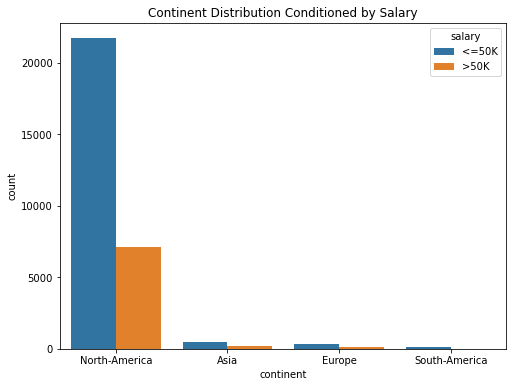

In [39]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df['continent'], data=df, hue='salary')
plt.title("Continent Distribution Conditioned by Salary");

- The continent with the most people earning over 50K is North America. It also has the most number of earners.
- It is followed by Asia, Europe and South-America in descending order.

#### Numerical categorical variable

Looking at the data, education_number_of_years tallies with the education level. I will be converting the education_number_of_years column to a category data type.

- Preschool = 1
- 1st-4th = 2
- 5th-6th = 3
- 7th-8th = 4
- 9th = 5
- 10th = 6
- 11th = 7
- 12th = 8
- HS-grad = 9
- Some-college = 10
- Assoc-voc = 11
- Assoc-acdm = 12
- Bachelors = 13
- Masters = 14
- Prof-school = 15
- Doctorate = 16

But first, confirm the above is true for all rows in the dataframe

In [40]:
# confirming the education column tallies with the education_no_of_years in the dataframe
edu_level = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 
             'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']

years = [i for i in range(1, 17)] # years 1 - 16

# getting the rows where education does not tally with the appropriate number of years
affected_rows = [df[(df['education'] == edu) & (df['education_no_of_years'] != yrs)].index \
                 for edu,yrs in zip(edu_level, years)]

affected_rows

[Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64')]

- Everything looks in place. No rows were returned

In [41]:
# converting education_number_of_years to categorical datatype
df['education_no_of_years'] = df['education_no_of_years'].astype('category')

In [42]:
# quality check
df['education_no_of_years'].dtype

CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], ordered=False)

#### Converting the target in the df dataframe to 1s and 0s

In [43]:
# applying the encode_target function
df['salary'] = df['salary'].apply(encode_target)

In [44]:
# quality check
df.sample(5)

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary,continent
9848,17,Private,293440,11th,7,Never-married,Adm-clerical,Own-child,White,Female,0,0,15,United-States,1,North-America
21892,42,Private,280410,HS-grad,9,Married,Other-service,Husband,Black,Male,0,0,40,Haiti,1,North-America
10174,60,Private,355865,Masters,14,Married,Exec-managerial,Husband,White,Male,0,0,50,United-States,0,North-America
27944,41,Local-gov,336571,Some-college,10,Married,Exec-managerial,Husband,White,Male,0,0,40,United-States,1,North-America
24995,39,Private,160120,Some-college,10,Never-married,Machine-op-inspct,Other-relative,Asian-Pac-Islander,Male,0,0,40,Philippines,1,Asia


### Building the model

#### Feature Selection

In [45]:
df['salary'].value_counts()

1    22640
0     7506
Name: salary, dtype: int64

In [46]:
df['salary'].value_counts(normalize=True)

1    0.751012
0    0.248988
Name: salary, dtype: float64

- From the above, we can see that the target data is imbalanced as one category is higher than the other.
- About **75% of people earn 50K and below (1 class)**, while about **25% of peple earn over 50K (0 class)**.

#### Splitting the data

I would be dropping the columns listed below:
- **education**. This column is also represented by the education number of years column
- **native_country**. This column has been grouped by continent. I would be using the continent column instead.

In [47]:
# feature selection
X = df.drop(['salary', 'education', 'native_country'], axis=1) 
y = df['salary'] #target data

#### Creating dummy variables

In [48]:
# This is a method of one hot encoding categorical variables to convert them to numerical variables
X = pd.get_dummies(X, drop_first=True)

In [86]:
X.columns

Index(['age', 'fnlwgt', 'capital_gain', 'capital_loss',
       'working_hours_per_week', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'education_no_of_years_2',
       'education_no_of_years_3', 'education_no_of_years_4',
       'education_no_of_years_5', 'education_no_of_years_6',
       'education_no_of_years_7', 'education_no_of_years_8',
       'education_no_of_years_9', 'education_no_of_years_10',
       'education_no_of_years_11', 'education_no_of_years_12',
       'education_no_of_years_13', 'education_no_of_years_14',
       'education_no_of_years_15', 'education_no_of_years_16',
       'marital_status_Married', 'marital_status_Never-married',
       'marital_status_Separated', 'marital_status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
 

In [49]:
# dimeansion of the training data
X.shape

(30146, 58)

- There are 30146 rows and 58 columns in the data

In [50]:
# splitting the data. Using 80/20 for training and test
from sklearn.model_selection import train_test_split

# split data into train_validation and test data
x_train_val, x_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# splitting the train_validation data into training and validation data
x_train, x_val, y_train, y_val = train_test_split(x_train_val, 
                                                  y_train_val, 
                                                  test_size=0.2, 
                                                  random_state=0, 
                                                  stratify=y_train_val)

In [51]:
# quality check
y_train.value_counts(normalize=True)

1    0.750985
0    0.249015
Name: salary, dtype: float64

In [52]:
# quality check
y_val.value_counts(normalize=True)

1    0.751036
0    0.248964
Name: salary, dtype: float64

In [53]:
# quality check
y_test.value_counts(normalize=True)

1    0.751078
0    0.248922
Name: salary, dtype: float64

#### Scale the data

In [87]:
# creating an instance of the scaler
scaler = StandardScaler()

# scaling the data
x_train_sc = scaler.fit_transform(x_train)
x_val_sc = scaler.transform(x_val)
x_test_sc = scaler.transform(x_test)

#### Training the model

In [55]:
# creating an instance of the class
log_reg = LogisticRegression(random_state=0)

In [56]:
# function to train a model and compute train accuracy
def train(model, X, y):
    """Function to train a model and compute accuracy
    Args:
        model: untrained model 
        X: train features
        y: train target
    Returns:
        trained_model: The trained model
    """
    trained_model = model.fit(X, y) # training the model
    preds = trained_model.predict(X) # making a prediction
    accuracy = accuracy_score(y, preds) # calculating accuracy
    print(f"Train Accuracy: {accuracy}") # printing the accuracy score
    return trained_model # returning the trained model

In [57]:
# function to evaluate the model and compute metrics on test data

def evaluate_model(trained_model, X, y, threshold = 0.5): 
    """Function to evaluate the trained model with different metrics
    Args:
        trained_model: a trained model (classifier)
        X: validation data (features)/test data
        y: target in validation data
        threshold: value to filter predictions
    """
    
    # predicting probability
    pred_proba = trained_model.predict_proba(X)[:, 1] # selecting the 1 class from the matrix
    pred_class = np.round(pred_proba > threshold) # convert probability to 0 or 1 class
    acc = accuracy_score(y, pred_class) # calculating accuracy on the validation data
    recall = recall_score(y, pred_class) # getting the recall
    precision = precision_score(y, pred_class) # getting the precision
    f1 = f1_score(y, pred_class) # getting the f1 score of the model
    
    # creating a dataframe with the result of all the metrics. Index [0] sets an index for the dataframe
    df = pd.DataFrame({
        "Accuracy": acc,
        "precision": precision,
        "Recall": recall,
        "F1": f1
        
    }, index = [0])
    
    # computing the confusion matrix
    conf = confusion_matrix(y, pred_class, labels = [0, 1]) # target, predicted values, and labels 
    disp = ConfusionMatrixDisplay(conf, display_labels=[0, 1]) # setting the display for the confusion matrix
    disp.plot() # plotting the confusion matrix
    plt.show() # showing the confusion matrix
    
    return df # returns the dataframe of the calculated metrics

In [58]:
log_reg_model = train(log_reg, x_train_sc, y_train)

Train Accuracy: 0.8453244868339208


- The model has an accuracy of **85%**. This means that the model will correctly classify the data 85% of the time, assuming the model is fed new data similar to the one used to train it.

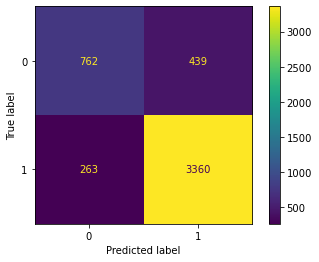

,Accuracy,precision,Recall,F1
0,0.854478,0.884443,0.927408,0.905416


In [59]:
log_reg_metrics = evaluate_model(log_reg_model, x_val_sc, y_val)
log_reg_metrics

**Explaining the Confusion Matrix**
- The True Positive is 3360 which is the total number of correct predictions for the 1 class (<=50K). Out of 3623 people who earn <=50K, the model correctly predicted 3360 of them. 
- The True Negative is 762. Out of 1201 people that earn >50K, the model correctly predicted 762 of them.
- The False Positive is 439 which is the total number of incorrect predictions in the 0 class (>50K). Out of 1201 people who earn >50K, the model is incorrectly predicting 439 to earn <=50K.
- The False Negative is 263. Out of 3623 people who earn <=50K, the model is incorrectly predicting 263 to earn >50K.
- The actual positives are 3623 (263 + 3360)
- The actual negatives are 1201 (762 + 439)

**Explaining the Metrics**
- The accuracy on the validation data is 85%, similar to the accuracy obtained on the training data. This means that the model will correctly predict outcomes 85% of the time if it is fed new data similar to the one used to train it.
- The precision is 88%, which is the percentage of correct predictions in the predicted values. From the confusion matrix, out of 3799 people in the validation data that the model predicted to earn <=50K , the model predicted 88% correctly.
- The Recall is 93%, which is the percentage of correct predictions made by the model from the validation data. Out of 3623 people in the validation data that earn <=50K, the model predicted 93% correctly. 
- The f1 score is 91% and combines the precision and recall using their harmonic mean. A higher f1 score means a better performing classifier.

#### Important Features from the Model Coefficients

In [60]:
# getting the coefficients
log_reg_model.coef_[0]

array([-0.34071529, -0.05616847, -2.24069957, -0.26516306, -0.37132331,
        0.172391  ,  0.02499566,  0.24676322,  0.06851673,  0.28797596,
        0.17465404,  0.16539376,  0.01372746,  0.07593109,  0.02921137,
        0.04170364, -0.0423033 , -0.05848974, -0.10535531, -0.51109065,
       -0.57774093, -0.33186057, -0.26847831, -0.82722663, -0.54835866,
       -0.40793152, -0.35273172, -0.14955575,  0.31315557,  0.03974114,
       -0.00557117,  0.08948226, -0.02814461, -0.276548  ,  0.16890636,
        0.13504071,  0.05279011,  0.28414709,  0.23970872, -0.1859204 ,
       -0.06699912, -0.09669101, -0.11168843,  0.010035  ,  0.02499566,
        0.51679992,  0.23008369,  0.79636278,  0.3709213 , -0.2901933 ,
       -0.11269472, -0.08421568,  0.02169501, -0.13603956, -0.43341888,
       -0.09018558, -0.10770538,  0.08653536])

- These are the coefficient values that represent each variable in the data which the model learns
- The first three variables are 'age', 'fnlwgt', 'capital_gain' and their corresponding coefficients are -0.34071529, -0.05616847, -2.24069957.
  - **Age**: If the age of an individual increases by one year, assuming all other variables remain constant, the log-odds (logit) of an individual 
- It means that for a one unit increase in a variable, assuming all other variables remain constant, the log-odds (logit) of the target variable increases (if coefficient is positive) or decreases (if coefficient is negative) by the corresponding coefficient value.

#### Calculating the odds

In [82]:
exp_odds = np.exp(-0.34071529)
exp_odds

0.7112613826100412

In [83]:
odds = (1 - exp_odds) * 100
odds

28.873861738995878

To get the odds, we compute the exponent of the logit value and subtract it from 1 to get the percentage.  

The above value can be interpreted as for one unit increase in the corresponding variable, assuming all other variables remain constant, the odds of an individual earning over 50K per annum increases by approximately 29%

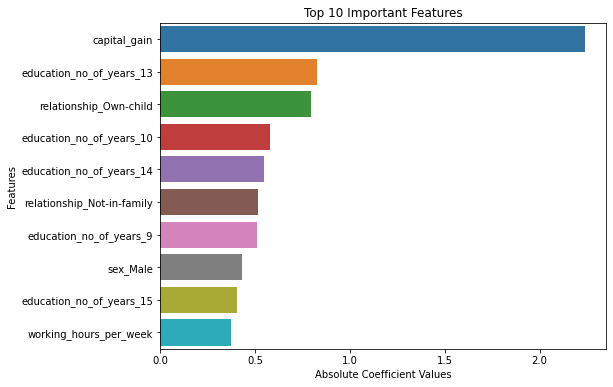

In [61]:
# getting the important features from the model coefficients
coef_abs = np.abs(log_reg_model.coef_[0]) # getting the absolute values for
# storing the features and coefficients in a dataframe
df_coef = pd.DataFrame({'feature': x_train.columns, 'coef': coef_abs})
df_coef = df_coef.sort_values(by='coef', ascending=False) # sorting the coefficient values in descending order

# bar chart of the most important features
plt.figure(figsize=(8, 6))
sns.barplot(data=df_coef.head(10), x='coef', y='feature')
plt.xlabel("Absolute Coefficient Values")
plt.ylabel("Features")
plt.title("Top 10 Important Features")
plt.savefig('coeff');

### Optimising the model

I will be using 3 methods to do optimise the model:
- Using the penalty parameter l1
- Using data imbalance techniques like SMOTE
- Adjusting the metrics to find the optimal threshold from the Precision-Recall curve 

#### Penalty l1

In [62]:
log_reg2 = LogisticRegression(penalty='l1', solver='liblinear', random_state=0)

In [63]:
log_reg_pen_model = train(log_reg2, x_train_sc, y_train)

Train Accuracy: 0.8452208169189301


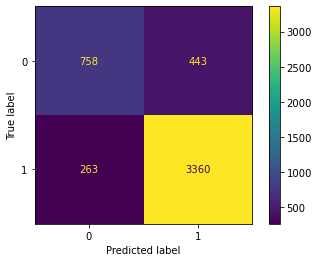

,Accuracy,precision,Recall,F1
0,0.853648,0.883513,0.927408,0.904929


In [64]:
evaluate_model(log_reg_pen_model, x_val_sc, y_val)

- The values here are similar to that of the original model.

**Explaining the Confusion Matrix**
- The True Positive is 3360 which is the total number of correct predictions for the 1 class (<=50K). Out of 3623 people who earn <=50K, the model correctly predicted 3360 of them. 
- The True Negative is 758. Out of 1201 people that earn >50K, the model correctly predicted 758 of them.
- The False Positive is 443 which is the total number of incorrect predictions in the 0 class (>50K). Out of 1201 people who earn >50K, the model is incorrectly predicting 443 to earn <=50K.
- The False Negative is 263. Out of 3623 people who earn <=50K, the model is incorrectly predicting 263 to earn >50K.
- The actual positives are 3623 (263 + 3360)
- The actual negatives are 1201 (758 + 443)

#### Imbalanced data techniques

In [65]:
# importing the relevant packages
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [66]:
# instantiating the balancing methods
smote = SMOTE(random_state=0)

In [67]:
# creating a function to balance the data
def balance_data(X, y, smote_type):
    """Function to balance data using different balancing techniques
    Args:
        X: Training features
        y: train target
        smote_type: kind of imbalance strategy
    """
    
    X_res, y_res = smote_type.fit_resample(X, y) # resampling the model
    return X_res, y_res # returning the resampled train and test data

In [68]:
# resampling the data
x_train_sm, y_train_sm = balance_data(x_train_sc, y_train, smote)

Train Accuracy: 0.8277540033130867


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


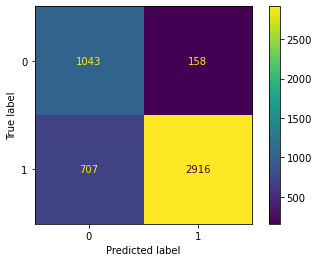

,Accuracy,precision,Recall,F1
0,0.820688,0.948601,0.804858,0.870838


In [69]:
# smote
log_reg_sm = train(log_reg, x_train_sm, y_train_sm)
df_sm = evaluate_model(log_reg_sm, x_val_sc, y_val)
df_sm

- From the optimisation methods above, SMOTE has the highest precision value (95%). The False Posive value is the lowest in this model.

**Explaining the Confusion Matrix**
- The True Positive is 2916 which is the total number of correct predictions for the 1 class (<50K). Out of 3623 people who earn <50K, the model correctly predicted 2916 of them. 
- The True Negative is 1043. Out of 1201 people that earn >=50K, the model correctly predicted 1043 of them.
- The False Positive is 158 which is the total number of incorrect predictions in the 0 class (>=50K). Out of 1201 people who earn >=50K, the model is incorrectly predicting 158 to earn <50K.
- The False Negative is 707. Out of 3623 people who earn <50K, the model is incorrectly predicting 707 to earn >=50K.
- The actual positives are 3623 (707 + 2916)
- The actual negatives are 1201 (1043 + 158)

#### Precision-Recall Curve

In [70]:
# import relevant libraries
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

def get_precision_recall(model, X, y):
    """Function to compute Precision-Recall score and curve
    Args:
        model: a trained model
        X: validation features
        y: target in validation data
    """
    preds = model.predict_proba(X)[:, 1] # using the model to make probability predictions
    # computing the precision_recall curve from the precision, recall and thresholds
    precision, recall, thresh = precision_recall_curve(y, preds) 
    f1_scores = 2 * (precision * recall) / (precision + recall) # computing the f1_scores
    # getting the optimal threshold from the index of the max f1_score
    thresh_opt = thresh[np.argmax(f1_scores)] 
    plt.plot(recall, precision) # plotting the curve
    plt.xlabel('Recall') # x_label
    plt.ylabel('Precision') # y_label
    plt.title('Precision-Recall Curve') # plot title
    plt.show()

    print('Optimal threshold value:', thresh_opt)
    

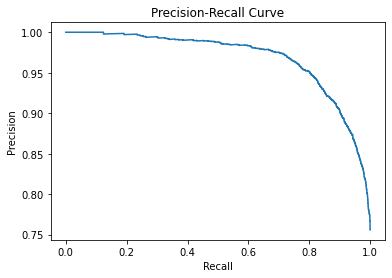

Optimal threshold value: 0.2040749867622401


In [71]:
# getting the precision-recall curve for the initial mode
get_precision_recall(log_reg_model, x_val_sc, y_val)

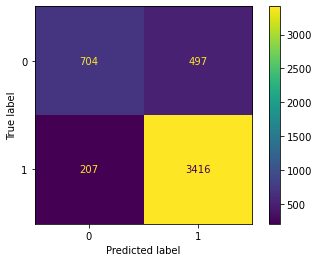

,Accuracy,precision,Recall,F1
0,0.854063,0.872987,0.942865,0.906582


In [73]:
# refitting the model with the optimal threshold
evaluate_model(log_reg_model, x_val_sc, y_val, threshold=0.2040749867622401)

The model has almost similar values to the original model and the penalty model. However, the recall increased slightly to 94%, reducing the False Negative value to 207 from 263.

**Explaining the Confusion Matrix**
- The True Positive is 3416 which is the total number of correct predictions for the 1 class (<=50K). Out of 3623 people who earn <=50K, the model correctly predicted 3416 of them. 
- The True Negative is 704. Out of 1201 people that earn >50K, the model correctly predicted 704 of them.
- The False Positive is 497 which is the total number of incorrect predictions in the 0 class (>50K). Out of 1201 people who earn >50K, the model is incorrectly predicting 497 to earn <=50K.
- The False Negative is 207. Out of 3623 people who earn <=50K, the model is incorrectly predicting 207 to earn >50K.
- The actual positives are 3623 (207 + 3416)
- The actual negatives are 1201 (704 + 497)

### Recommendation and Conclusion

- The model with the best metrics is the default model, however in order to identify more underprivileged persons in the society for effective policy implementation, the proposed model is the model with the optimal threshold obtained from the precision-recall curve  

- From the analysis, education is a major factor in determining income. The government should encourage citizens to further their education and create incentives such as  scholarships and grants  

- Females earn less than males, and minority races earn lower incomes. The government needs to create laws against employment discrimination based on gender and race.
